# 2.1 - Intro Machine Learning


![venn_ml](images/venn_ml.png)

![ext_sklearn](images/ext_sklearn.jpeg)

![sklearn](images/sklearn.png)



### WorkFlow

+ Obtener datos
+ Definir objetivo
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import pylab as plt
%matplotlib inline

In [2]:
# obtener datos

census=pd.read_csv('data/census.csv')

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
CensusId,3220.0,31393.605280,16292.078954,1001.0,19032.50,30024.00,46105.500,72153.0
TotalPop,3220.0,99409.345963,319305.453731,85.0,11218.00,26035.00,66430.500,10038388.0
Men,3220.0,48896.937888,156681.276856,42.0,5637.25,12932.00,32992.750,4945351.0
Women,3220.0,50512.408075,162661.952823,43.0,5572.00,13057.00,33487.500,5093037.0
Hispanic,3220.0,11.011522,19.241380,0.0,1.90,3.90,9.825,99.9
White,3220.0,75.428789,22.932890,0.0,64.10,84.10,93.200,99.8
Black,3220.0,8.665497,14.279122,0.0,0.50,1.90,9.600,85.9
Native,3220.0,1.723509,7.253115,0.0,0.10,0.30,0.600,92.1
Asian,3220.0,1.229068,2.633079,0.0,0.20,0.50,1.200,41.6
Pacific,3220.0,0.082733,0.734931,0.0,0.00,0.00,0.000,35.3


In [4]:
census.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

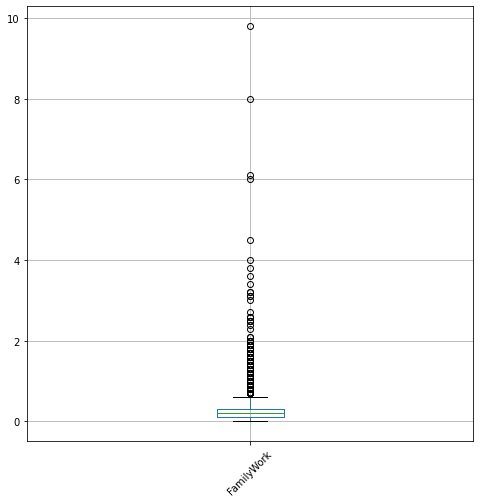

In [5]:
# outliers (Test de Tukey - 1.5·IQR)

plt.figure(figsize=(8, 8))

census.boxplot(column=['FamilyWork'])

plt.xticks(rotation=45);

In [6]:
q1=np.percentile(census.FamilyWork, 25)

q3=np.percentile(census.FamilyWork, 75)

In [7]:
iqr=q3-q1

# 3IQR

upper = q3 + 3*iqr

lower = q1 - 3*iqr

In [8]:
len(census[census.FamilyWork<lower])

0

In [9]:
census.shape

(3220, 37)

In [10]:
census=census[census.FamilyWork<upper] # aqui he filtrado los que son memnores que 3 veces iqr mas q3

In [11]:
census.shape

(3022, 37)

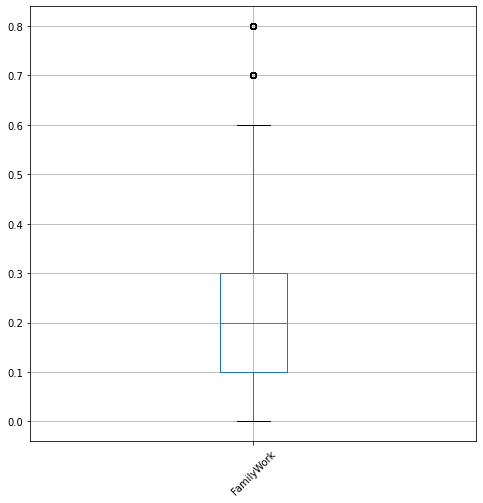

In [12]:
plt.figure(figsize=(8, 8))

census.boxplot(column=['FamilyWork'])

plt.xticks(rotation=45);

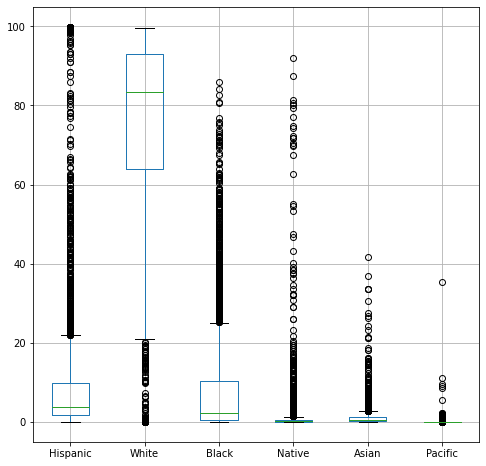

In [13]:
plt.figure(figsize=(8, 8))


census[['Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific']].boxplot();

In [14]:
# reescalado [0, 1]

def escala(x):
    return (x/100).round(3)

In [15]:
conversion=['Hispanic','White', 'Black', 'Native',
            'Asian', 'Pacific', 'Poverty', 'ChildPoverty',
            'Service', 'Office']

In [16]:
n_columnas=[x+'Rate' for x in conversion]

census[n_columnas]=census[conversion].apply(escala)

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239


In [17]:
# normalizacion

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [18]:
census['TotalPopScale']=RobustScaler().fit_transform(census.TotalPop.values.reshape(-1, 1))

In [19]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,TotalPopScale
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0.446361
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,2.790117
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,-0.027567
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,-0.100075
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0.488059


In [20]:
# variables categoricas

# one-hot encoding / get dummies (variable dummie) (onehotencoder esta en sklearn, get dummies en pandas)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

state=pd.get_dummies(census.State, drop_first=True)

census=pd.concat([census, state], axis=1)

census.tail()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,TotalPopScale,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2,0.964,0.034,0.001,0.0,0.000,0.0,0.485,0.561,0.216,0.247,0.473786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,0.0,0.0,7085,18104.0,3771.0,8821,939,39.1,58.1,18.4,38.2,18.5,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2,0.967,0.029,0.000,0.0,0.000,0.0,0.391,0.581,0.382,0.185,-0.325806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,0.0,0.0,18458,17818.0,1255.0,8420,486,54.0,68.3,23.6,21.0,21.8,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9,0.997,0.000,0.000,0.0,0.000,0.0,0.540,0.683,0.210,0.218,-0.065211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,0.1,0.0,27924,15627.0,1836.0,7960,512,52.3,62.1,25.9,25.9,20.7,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3,0.998,0.002,0.000,0.0,0.001,0.0,0.523,0.621,0.259,0.207,0.129024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3219,72153,Puerto Rico,Yauco,39474,19047,20427,99.5,0.5,0.0,0.0,0.0,0.0,30661,14708.0,1245.0,7743,474,51.7,56.3,28.1,20.5,26.7,14.2,10.5,84.8,8.5,1.2,1.6,0.7,3.1,24.6,8923,68.0,27.6,4.4,0.0,27.1,0.995,0.005,0.000,0.0,0.000,0.0,0.517,0.563,0.205,0.267,0.182550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
len(census.County.unique())

1827

In [22]:
#census.info(memory_usage='deep')

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

# son para cosas con orden o escala

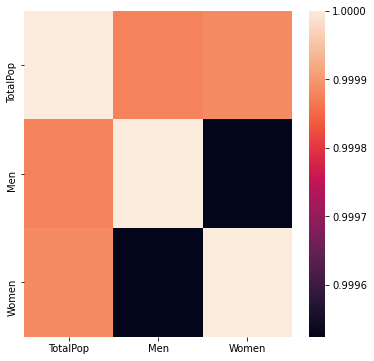

In [24]:
# colinealidad

import seaborn as sns

plt.figure(figsize=(6, 6))

sns.heatmap(census[['TotalPop', 'Men', 'Women']].corr());

In [25]:
# borrar columnas innecesarias

census=census.drop(columns=['State', 'County', 'Men', 'Women', 'CensusId', 
                            'Citizen', 'Employed', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr','TotalPopScale' # estas borradas despues
                           ])

In [26]:
census=census.dropna()

**Hasta aqui, los datos se suponen limpios y tratados**

In [27]:
# diferenciar datos, variables indep y la dep.
# Aqui se define el objetivo, en este caso predecir la poblacion

X=census.drop('TotalPop', axis=1)

y=census.TotalPop

In [28]:
# train test split

from sklearn.model_selection import train_test_split as tts

In [29]:
train, test = tts(census)

train.shape, test.shape

((2265, 87), (756, 87))

In [30]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2416, 86), (605, 86), (2416,), (605,))

# El MODELO

In [32]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 

In [33]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
linreg.coef_[:10]

array([ 2.01279942e+15, -8.56400000e+03, -4.95050000e+03, -5.98475000e+03,
        2.11357500e+04,  2.00547500e+04, -1.18250000e+03,  2.04450000e+03,
        3.99175000e+04,  3.43815000e+04])

In [35]:
linreg.intercept_

-1455302.7744011283

In [36]:
y_pred=linreg.predict(X_test)

y_pred[:10]

array([  23955.17858325,  434127.50371801,  364515.69876098,
       2124621.4982395 ,  133097.08941723,  -57536.6657898 ,
          7084.49906957,   55720.87219262,  511626.58013207,
        749617.34778051])

In [37]:
y_pred.shape==y_test.shape

True

In [38]:
r2_score(y_test, y_pred)

0.24705103192102418

In [44]:
mean_squared_error(y_test, y_pred, squared=False)

415152.90124837856

In [40]:
census.head()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,55221,2.6,75.8,18.5,0.4,1.0,0.0,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,195121,4.5,83.1,9.5,0.6,0.7,0.0,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26932,4.6,46.2,46.7,0.2,0.4,0.0,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22604,2.2,74.5,21.4,0.4,0.1,0.0,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,57710,8.6,87.9,1.5,0.3,0.1,0.0,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
census.TotalPop.mean(), census.TotalPop.std()

(105415.26713008937, 328765.1408853178)

In [45]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [57]:
rfr=RFR(n_estimators=200)

rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [58]:
#help(rfr)

In [59]:
y_pred=rfr.predict(X_test)

y_pred[:10]

array([  21062.265,  667678.56 ,  314845.305, 1323722.41 ,  202022.66 ,
         20452.305,   48341.03 ,   37633.135,  608538.705,  522635.01 ])

In [60]:
r2_score(y_test, y_pred)

0.3506412651094859

In [61]:
mean_squared_error(y_test, y_pred, squared=False)

385538.4078154238

### Feature Extraction and Engineering